<a href="https://colab.research.google.com/github/jarifNmohsin/Pytorch-Colab/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
 def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
  super().__init__() # instantiate our nn.Module
  self.fc1 = nn.Linear(in_features, h1)
  self.fc2 = nn.Linear(h1, h2)
  self.out = nn.Linear(h2, out_features)


 def forward(self, x):
   x = F.relu(self.fc1(x))
   x = F.relu(self.fc2(x))
   x = self.out(x)

   return x



In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# Change last columns from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-68-23a635f5616c>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train Test Split! Set X,y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [ ]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer and learning rate lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train our model!
#Epochs?
epochs = 4000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss
  loss = criterion(y_pred, y_train)

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

    # Do some back propagation: fine tuning
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.1095242500305176
Epoch: 20 and loss: 1.0960756540298462
Epoch: 30 and loss: 1.0845398902893066
Epoch: 40 and loss: 1.073915719985962
Epoch: 50 and loss: 1.0637413263320923
Epoch: 60 and loss: 1.0538722276687622
Epoch: 70 and loss: 1.0440350770950317
Epoch: 80 and loss: 1.0337213277816772
Epoch: 90 and loss: 1.0227365493774414
Epoch: 100 and loss: 1.0096259117126465
Epoch: 110 and loss: 0.9954349398612976
Epoch: 120 and loss: 0.9828447103500366
Epoch: 130 and loss: 0.9664683938026428
Epoch: 140 and loss: 0.9485272169113159
Epoch: 150 and loss: 0.9305612444877625
Epoch: 160 and loss: 0.9112032651901245
Epoch: 170 and loss: 0.8891754150390625
Epoch: 180 and loss: 0.8652693629264832
Epoch: 190 and loss: 0.8407701253890991
Epoch: 200 and loss: 0.8157405853271484
Epoch: 210 and loss: 0.7899296283721924
Epoch: 220 and loss: 0.7633073925971985
Epoch: 230 and loss: 0.7376409769058228
Epoch: 240 and loss: 0.7132112383842468
Epoch: 250 a

Text(0.5, 0, 'Epoch')

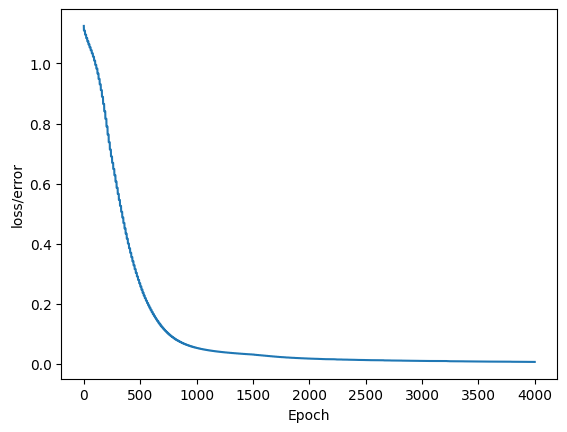

In [ ]:
# Graph it out !
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [80]:
# Evaluate model on Test Data Set (validate model on test set)
with torch.no_grad():   # Basically turn off back propagation
  y_eval = model.forward(X_test)  # X_test are features, y_eval will be predictions
  loss = criterion(y_eval, y_test)  # Find loss

In [81]:
loss

tensor(0.3625)

In [84]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower it thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.) tensor([-8.0152,  1.7469, 13.4934]) 	 2 	 2
2.) tensor([-10.8348,  -1.5647,  21.3255]) 	 2 	 2
3.) tensor([-12.3720,  -1.0296,  23.3321]) 	 2 	 2
4.) tensor([ 2.2878, 14.1494, -8.1174]) 	 1 	 1
5.) tensor([-10.4074,   0.3049,  18.6086]) 	 2 	 2
6.) tensor([  7.4393,  18.4064, -17.1490]) 	 1 	 1
7.) tensor([-6.6769,  4.0588, 10.4399]) 	 2 	 2
8.) tensor([ 2.7450, 14.7197, -9.0853]) 	 1 	 1
9.) tensor([-9.0945,  1.6502, 15.3545]) 	 2 	 2
10.) tensor([-11.5815,  -1.7283,  22.7592]) 	 2 	 2
11.) tensor([-5.4816,  5.1957,  8.0450]) 	 2 	 2
12.) tensor([ 43.8011,  33.6600, -64.5590]) 	 0 	 0
13.) tensor([ 39.7062,  30.4428, -58.4449]) 	 0 	 0
14.) tensor([  9.8576,  17.1533, -19.1589]) 	 1 	 1
15.) tensor([ 37.8450,  30.6502, -56.5768]) 	 0 	 0
16.) tensor([-3.7788,  7.2850,  4.4752]) 	 2 	 1
17.) tensor([ 40.0823,  31.0438, -59.1875]) 	 0 	 0
18.) tensor([-6.8957,  3.1852, 11.1284]) 	 1 	 2
19.) tensor([ 42.2415,  32.4360, -62.2311]) 	 0 	 0
20.) tensor([ 34.8592,  27.7865, -51.8684]) 	

In [88]:
new_iris = torch.tensor([5.1, 3.5, 1.4, 0.2])

In [90]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 45.0316,  34.4326, -66.2813])


In [91]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [92]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-92-5cdeecb78af9>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [93]:
# Make sure it loaded correct
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)